In [1]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import jax
import jax.numpy as np
import fenton_karma as fk
import deepexcite

## SEPARATE DIFFUSION AND REACTION TERM

In [2]:
# simulation inputs (real values)
root = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/"
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = fk.params.PARAMSET_1D

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# diffusivity 
d = 0.001  # cm^2/ms
shape = fk.convert.realsize_to_shape(field_size, dx)
diffusivity = np.ones(shape) * d

In [3]:
name = root + "train_dev_set/deepreact_spiral_params1D.hdf5"

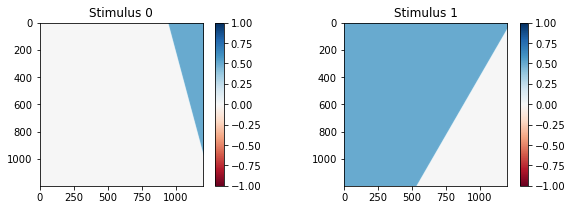

In [4]:
# times
start = 0  # ms
stop = 2000  # ms
reshape = (256, 256)
save_interval_ms = 1  # ms
show_every = 50  # ms

# stimuli
s1 = fk.stimulus.Protocol(start=0, duration=2, period=1e9)
s1 = fk.stimulus.triangular(shape, direction="right", angle=15, coverage=0.1, modulus=0.5, protocol=s1)

s2 = fk.stimulus.Protocol(start=fk.convert.ms_to_units(300, dt), duration=2, period=1e9)
s2 = fk.stimulus.triangular(shape, direction="up", angle=60, coverage=0.7, modulus=0.5, protocol=s2)

# s3 = fk.stimulus.protocol(start=fk.convert.ms_to_units(900, dt), duration=2)
# s3 = fk.stimulus.triangular(shape, direction="down", angle=30, coverage=0.7, modulus=1., protocol=s3)

stimuli = [s1, s2]
fk.plot.plot_stimuli(*stimuli)

In [5]:
# checkpoints = np.arange(start // dt, (stop - start) // dt, show_every // dt)
# states = fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

Tissue size (12, 12) Grid size (1200, 1200)
Checkpointing at: [     0    100    200 ... 199700 199800 199900]
Cell parameters Params(tau_v_plus=3.33, tau_v1_minus=19.6, tau_v2_minus=1000, tau_w_plus=667, tau_w_minus=11, tau_d=0.36, tau_0=8.3, tau_r=50, tau_si=45, k=10, V_csi=0.85, V_c=0.13, V_v=0.0055, Cm=1)


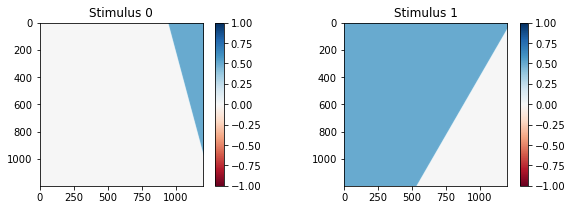

Solving at: 1999ms/1999ms		


In [6]:
deepexcite.data.generate.generate_fk(start=fk.convert.ms_to_units(start, dt),
                 stop=fk.convert.ms_to_units(stop, dt),
                 dt=dt, dx=dx,
                 cell_parameters=cell_parameters,
                 diffusivity=diffusivity,
                 stimuli=stimuli,
                 filename=name,
                 reshape=reshape,
                 save_interval_ms=save_interval_ms)

(2000, 5, 256, 256)
(40, 5, 256, 256)


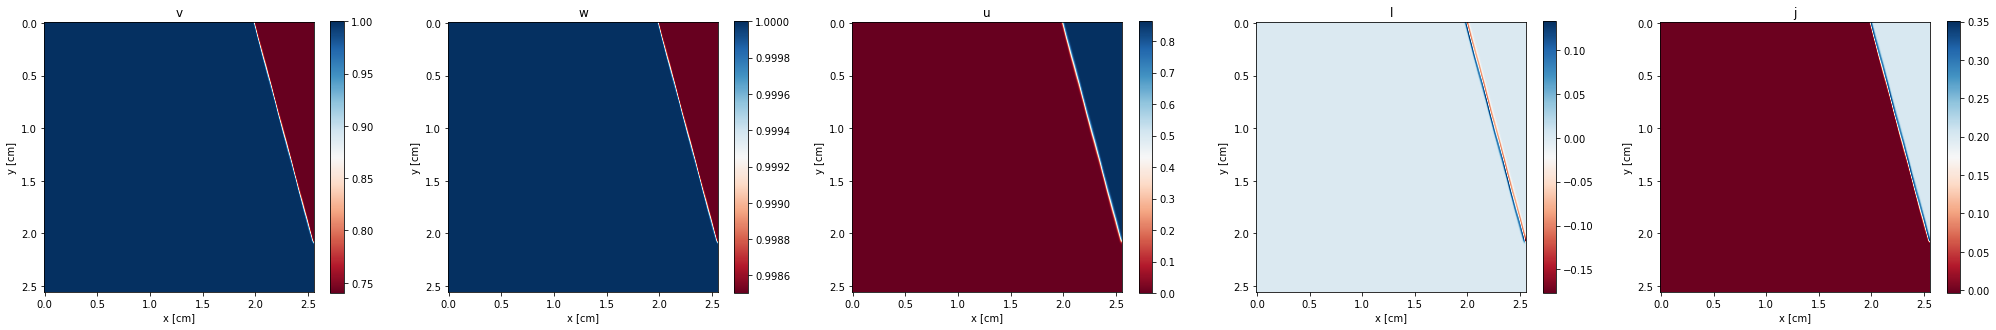

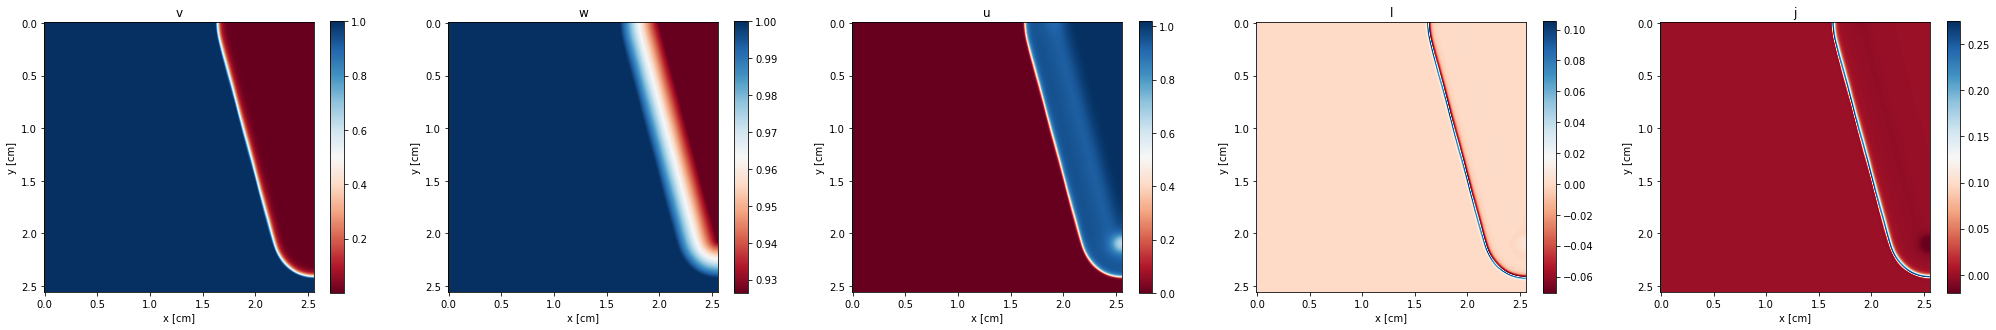

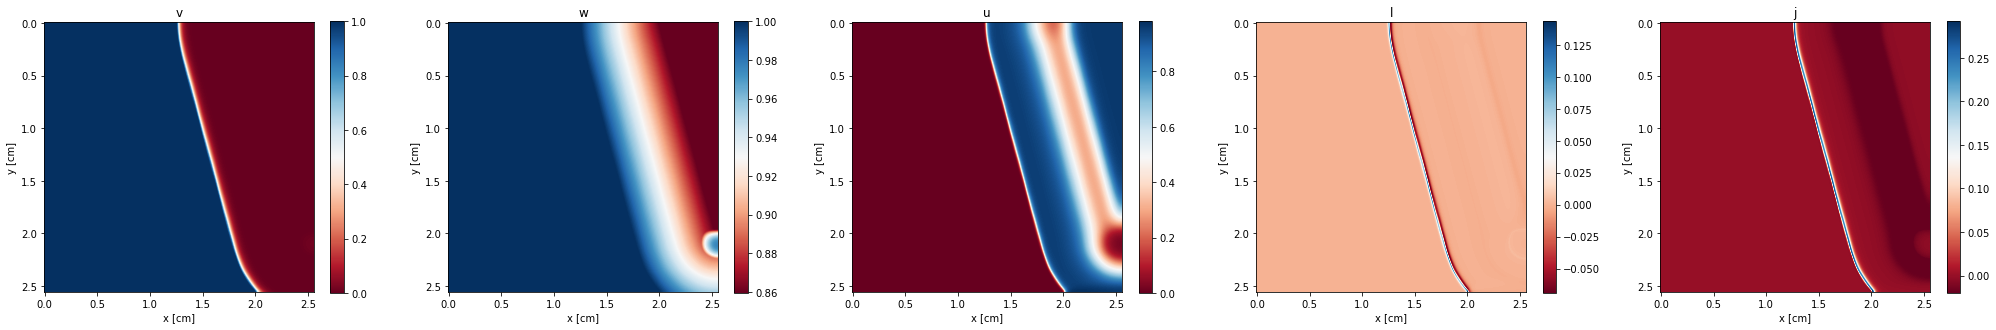

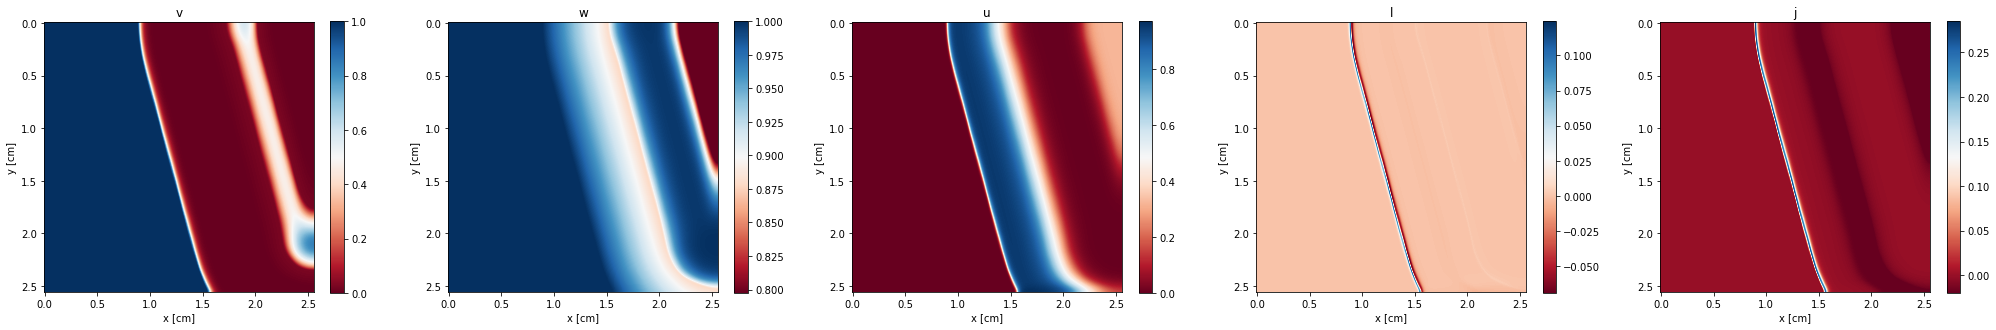

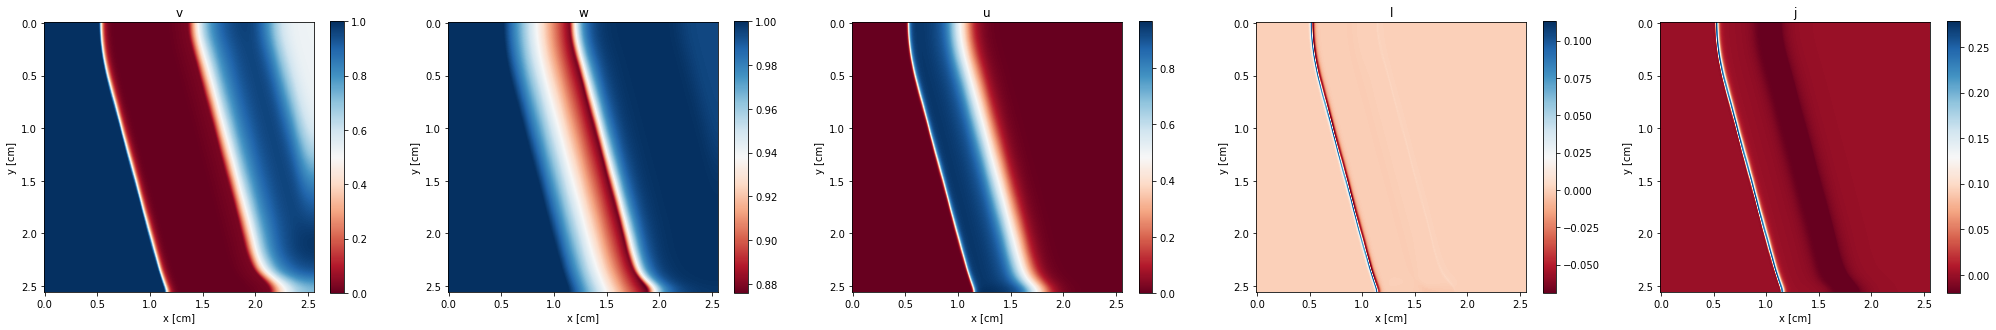

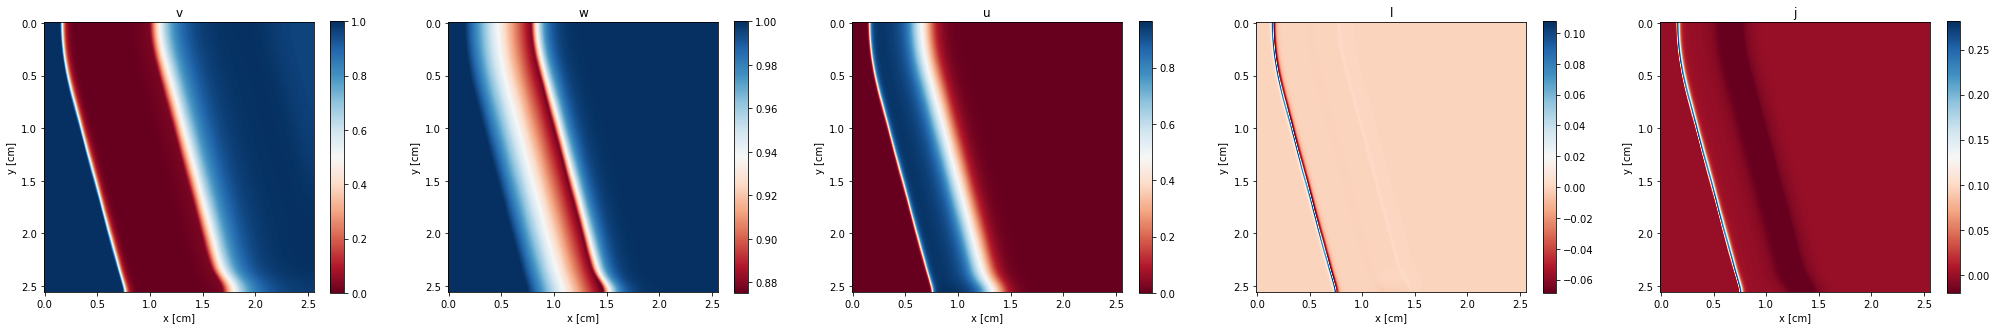

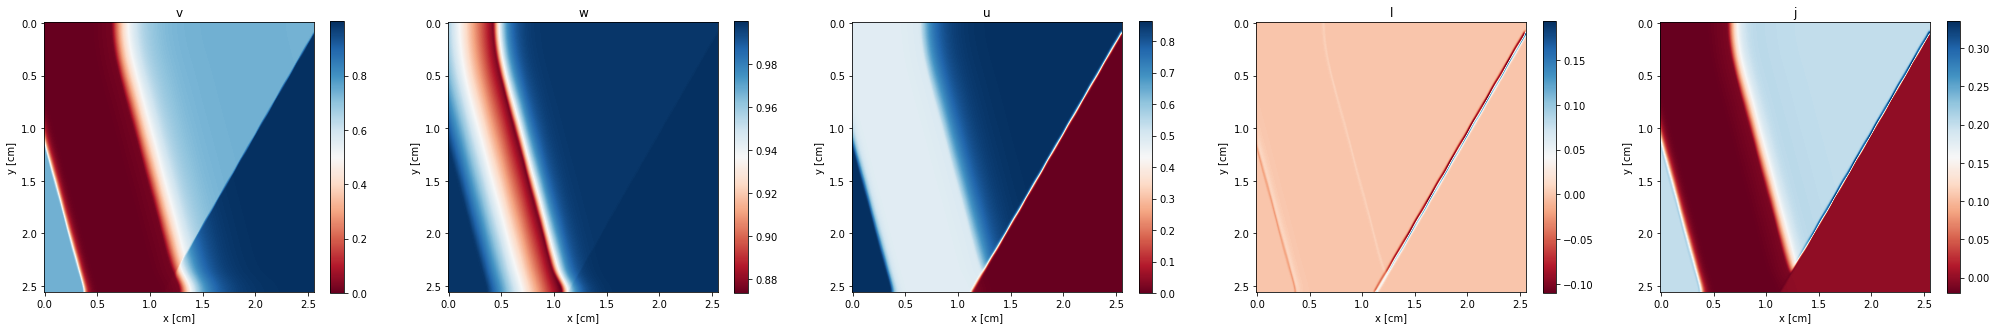

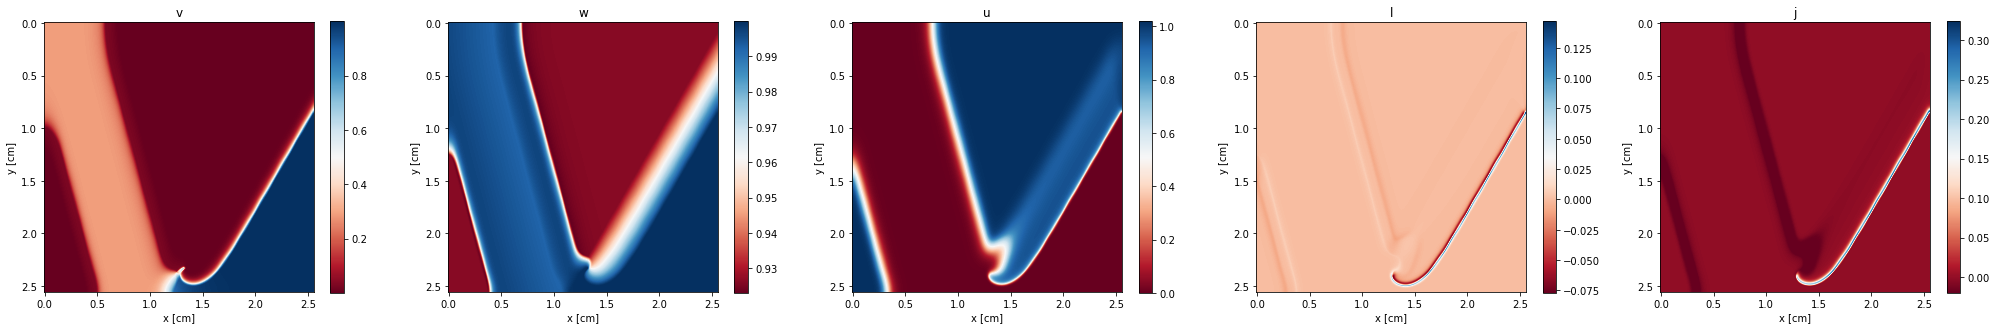

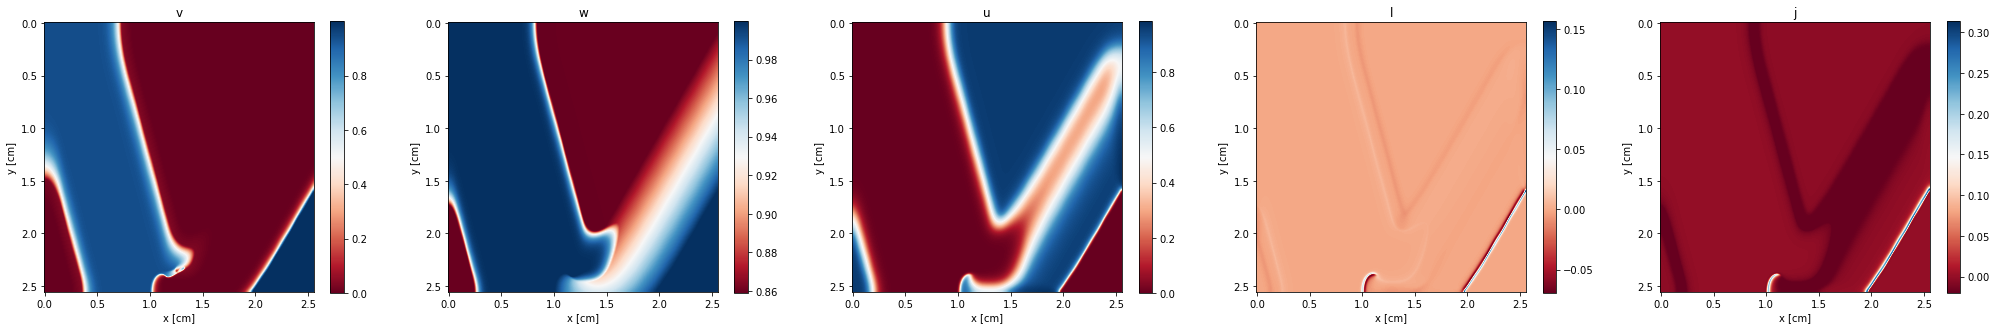

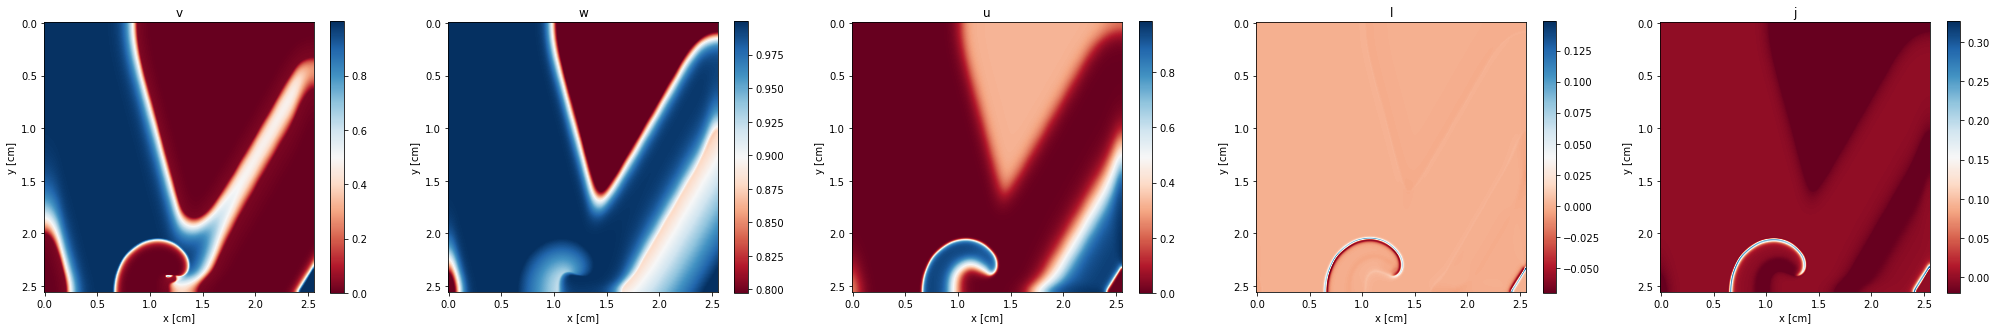

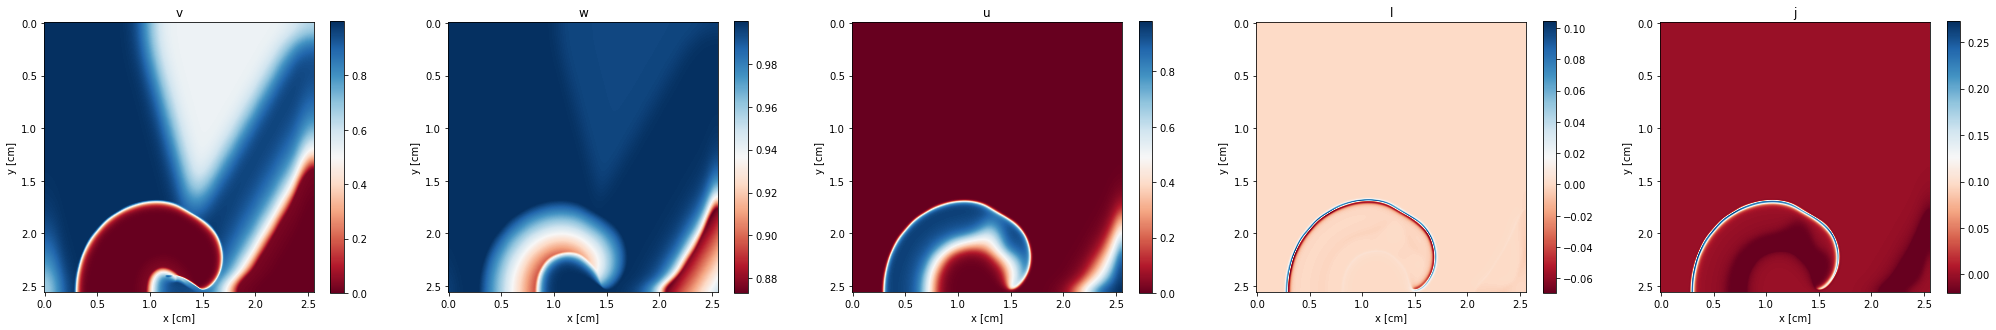

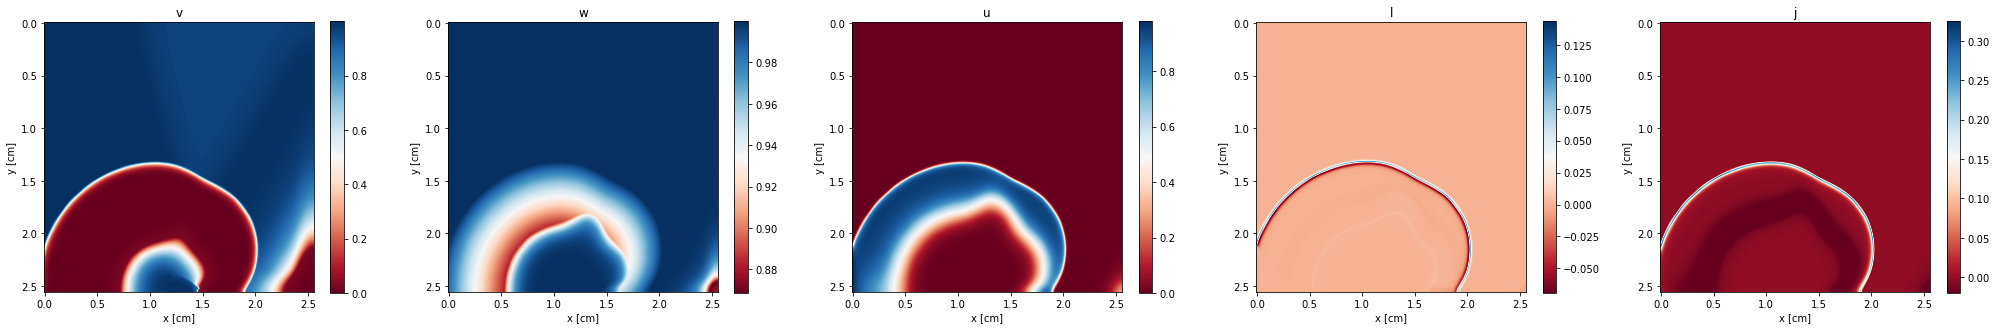

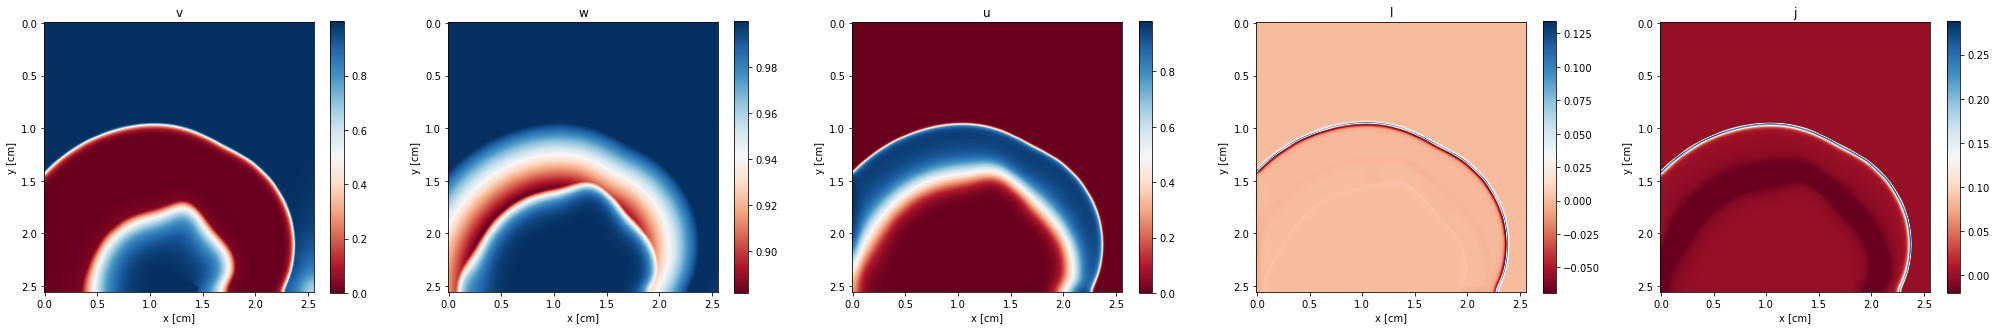

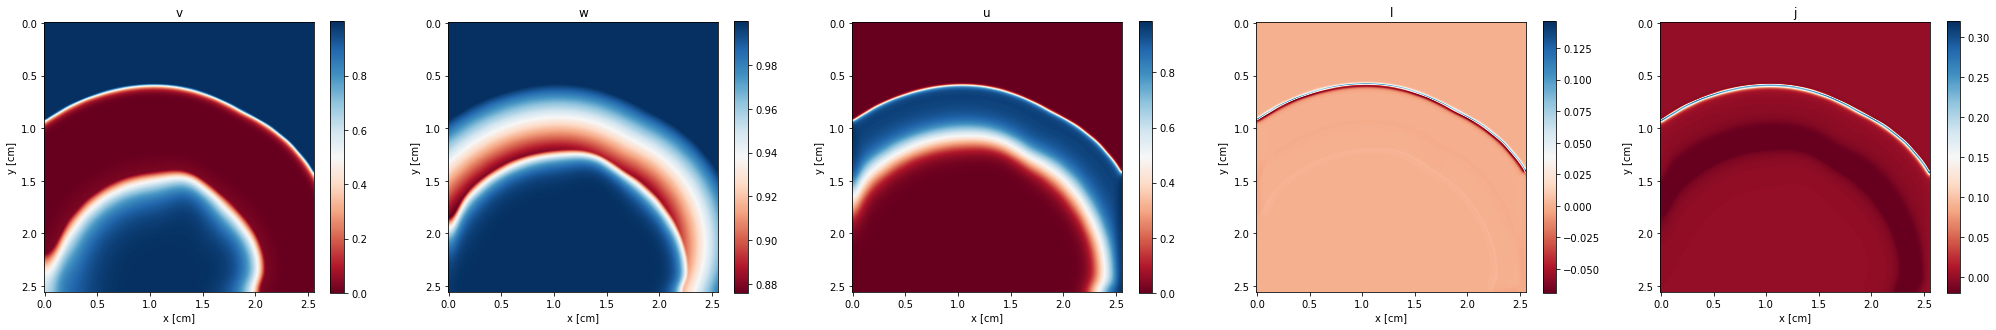

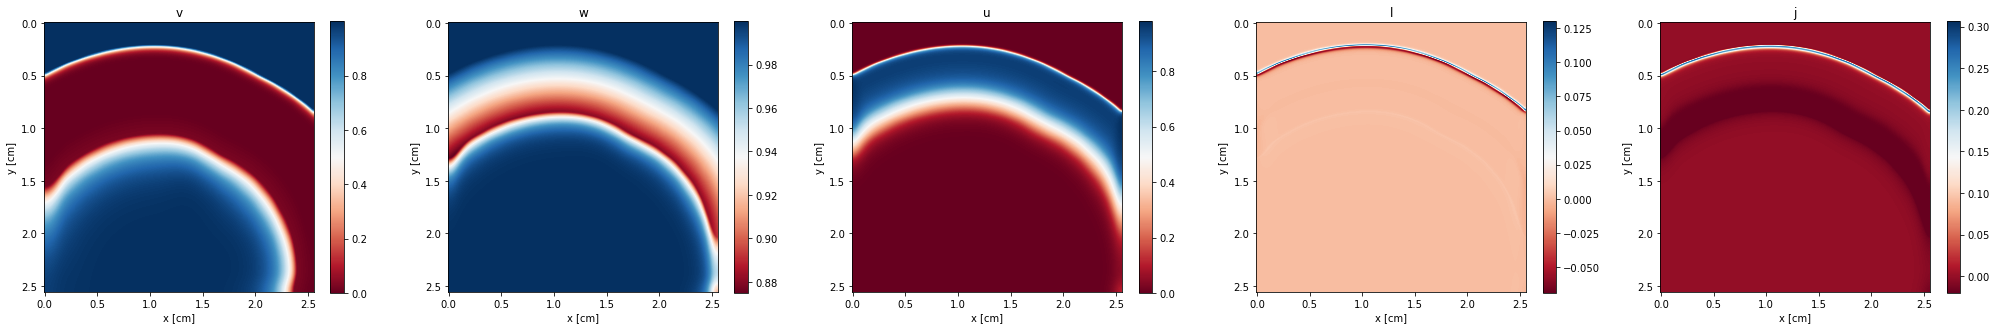

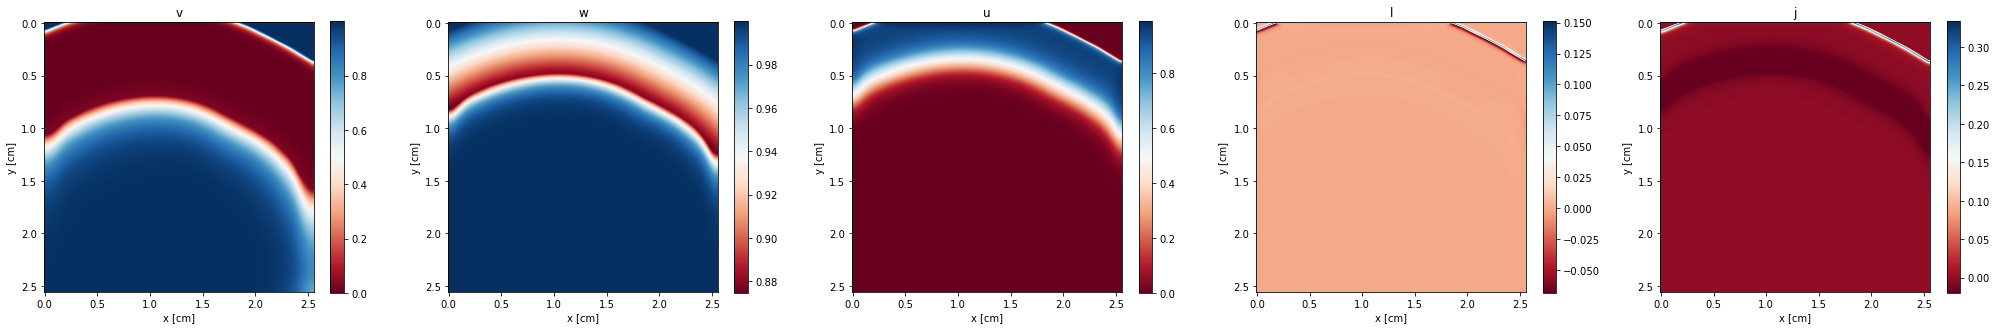

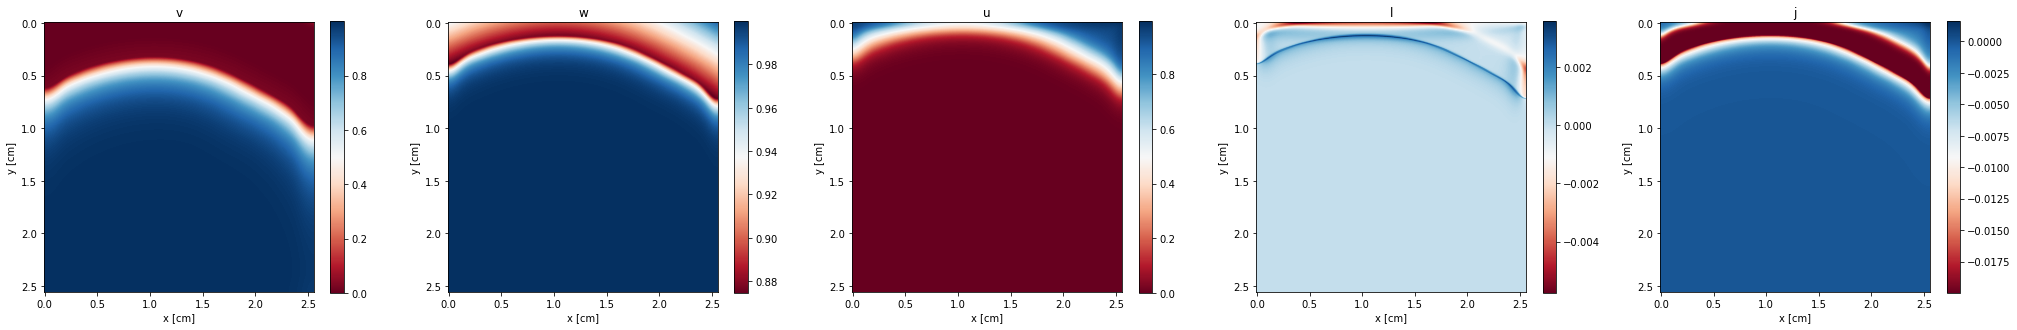

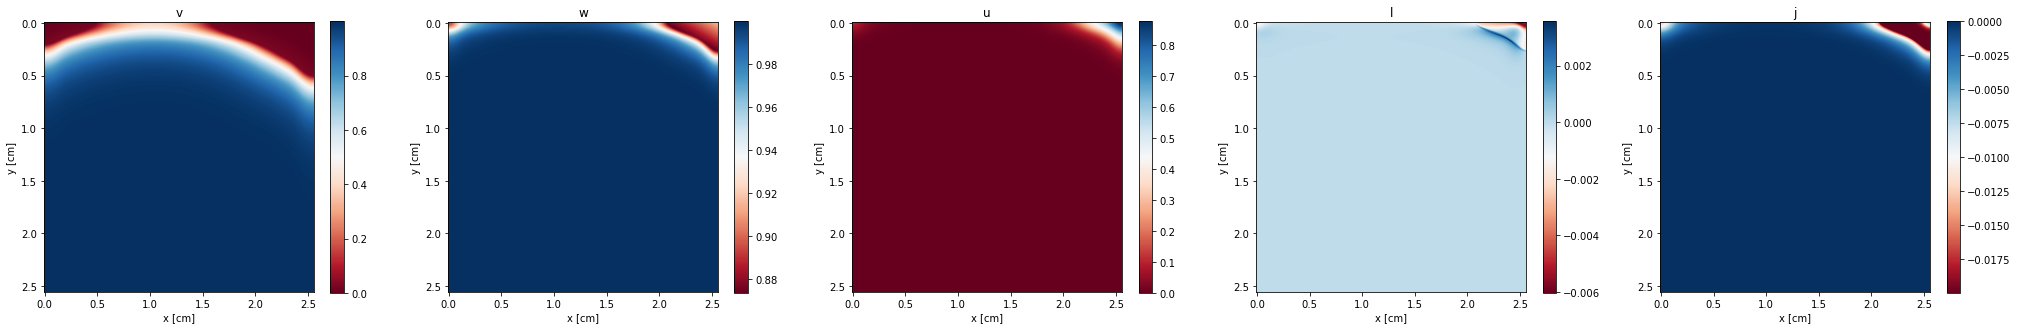

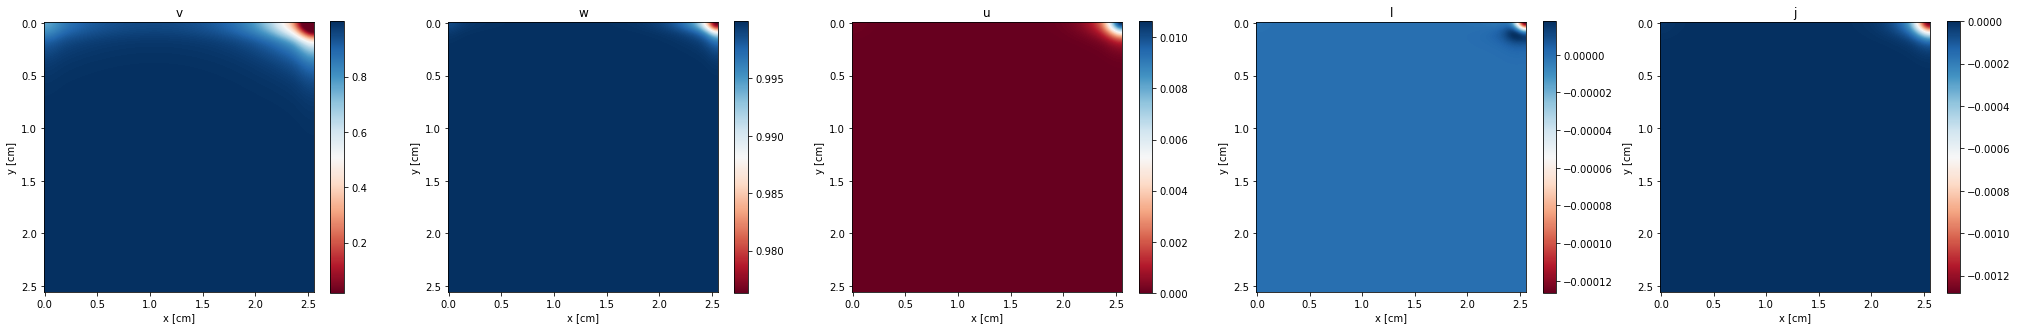

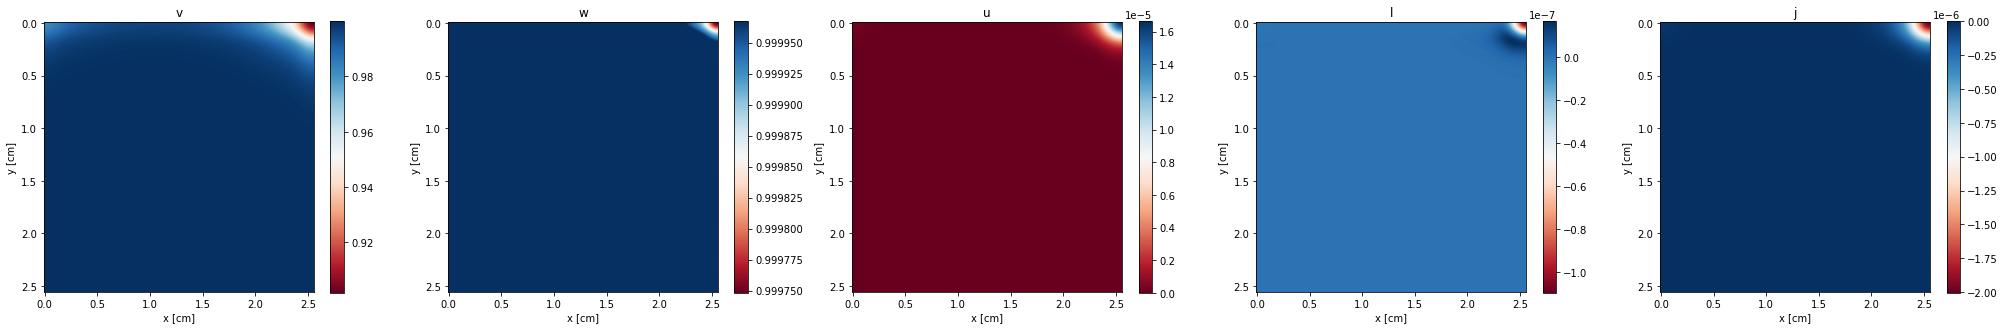

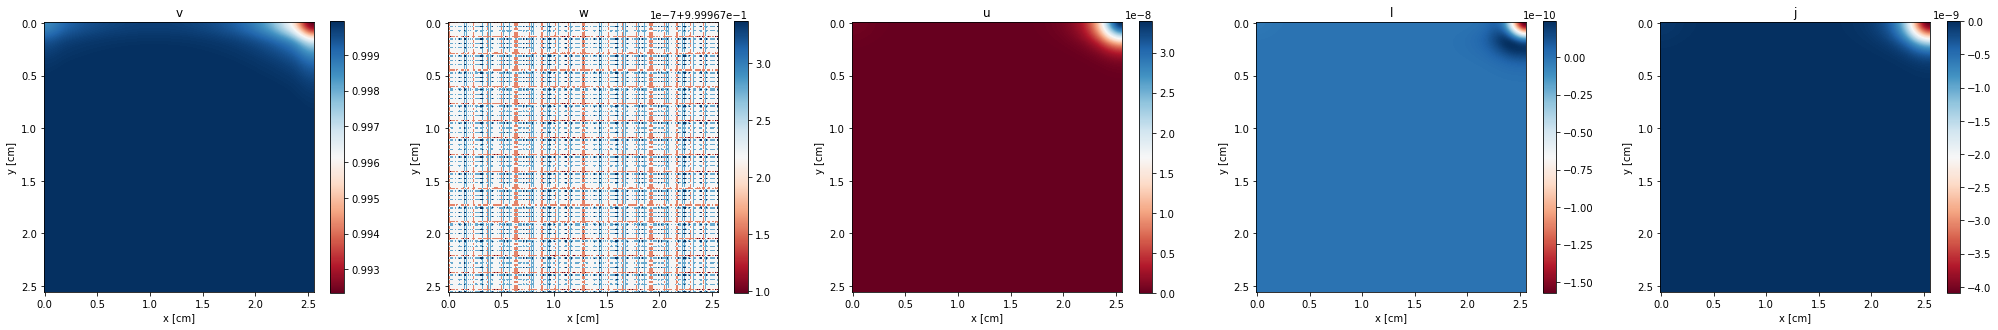

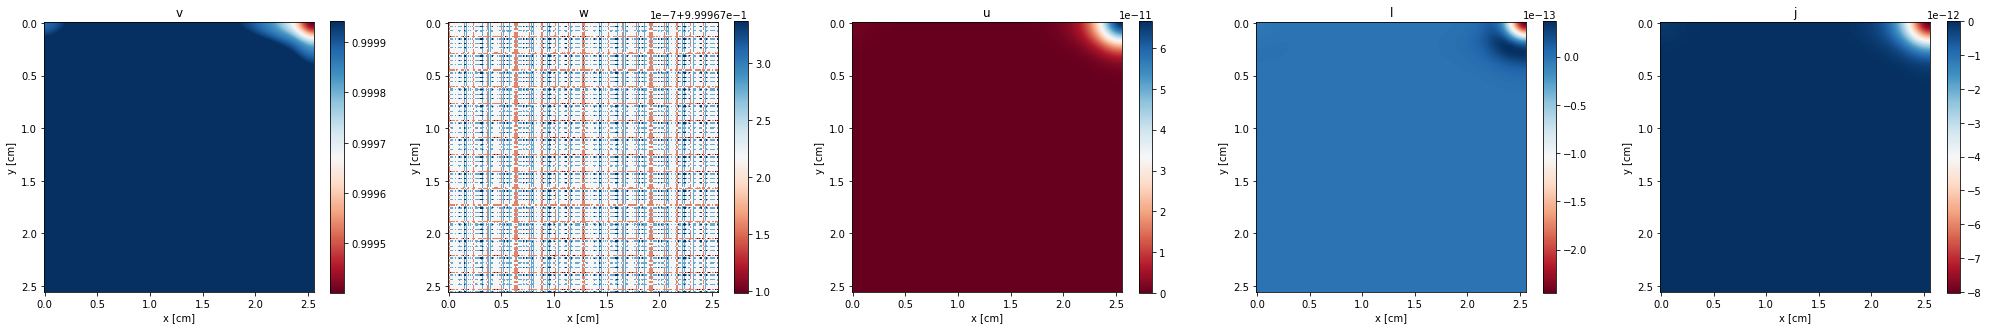

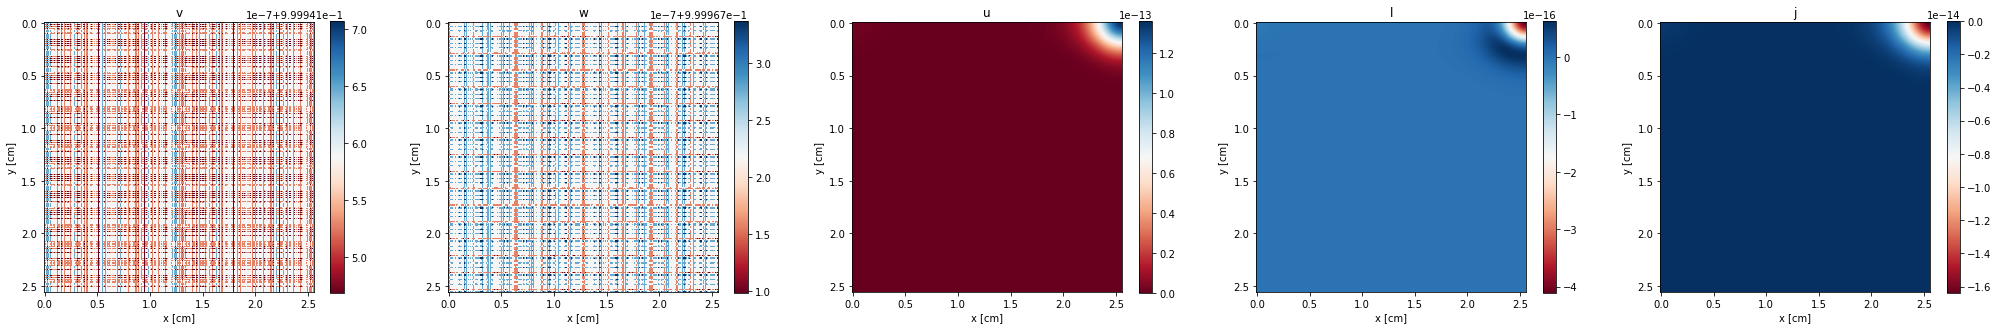

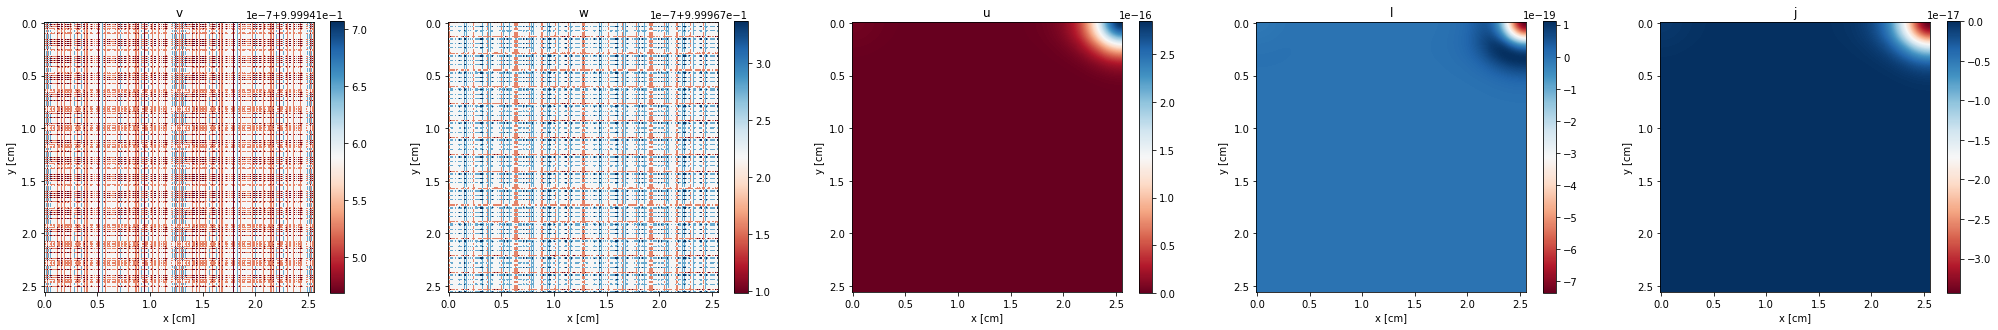

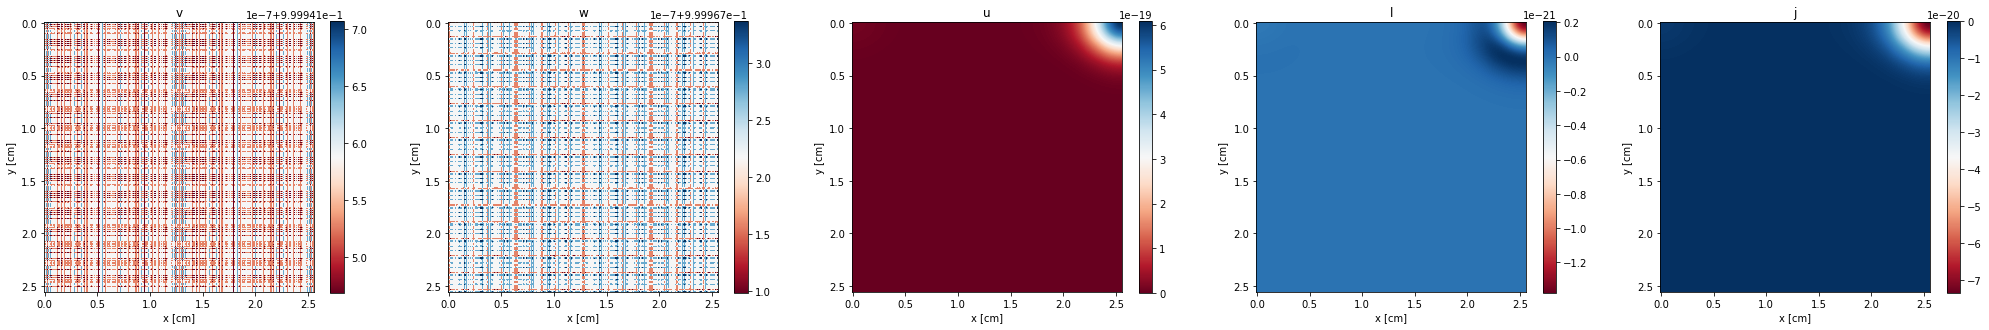

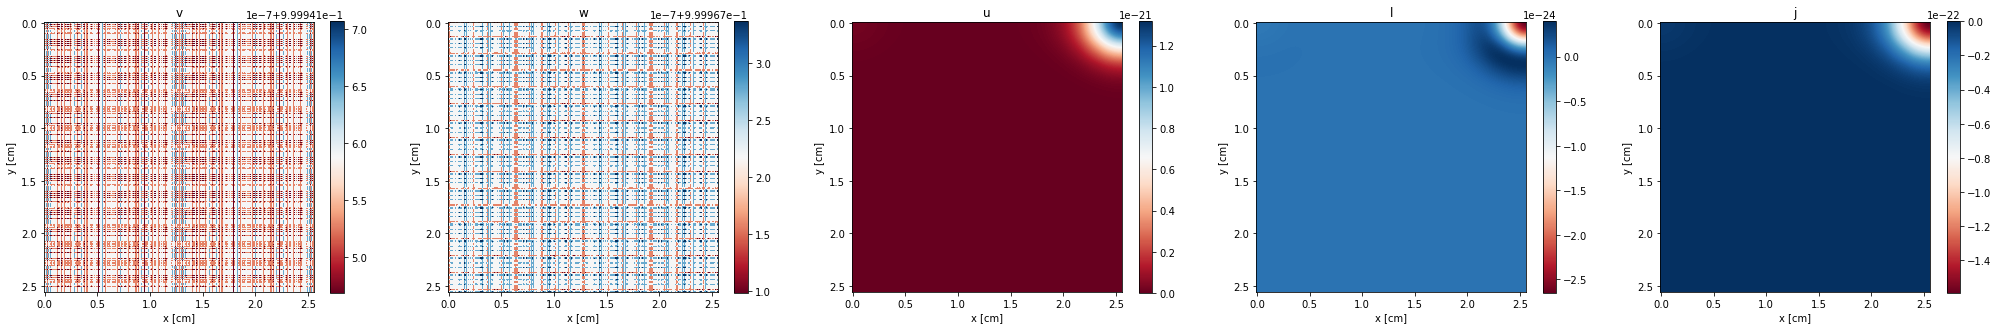

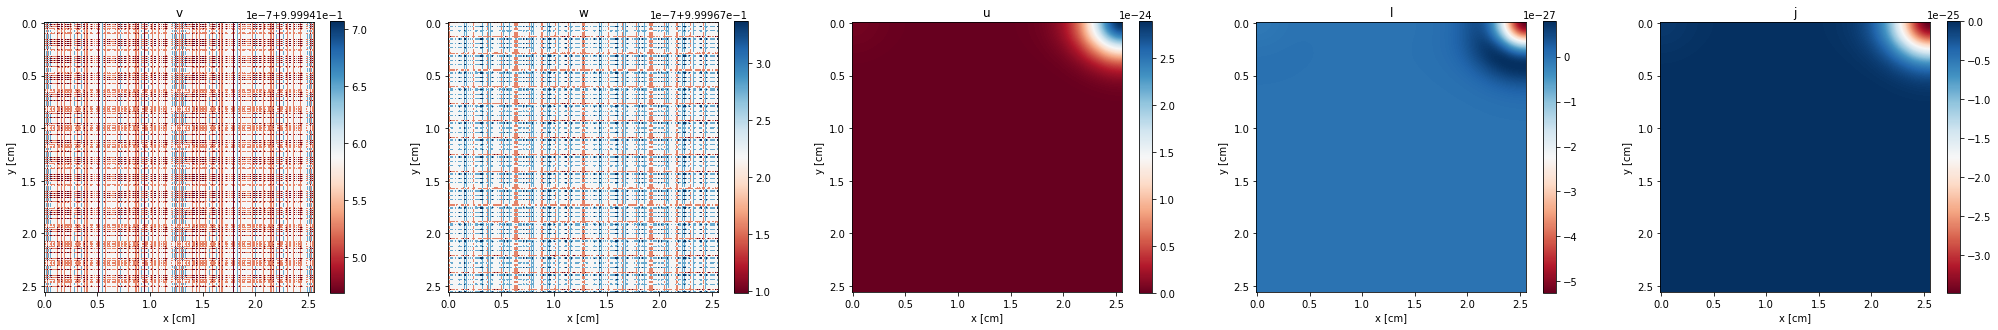

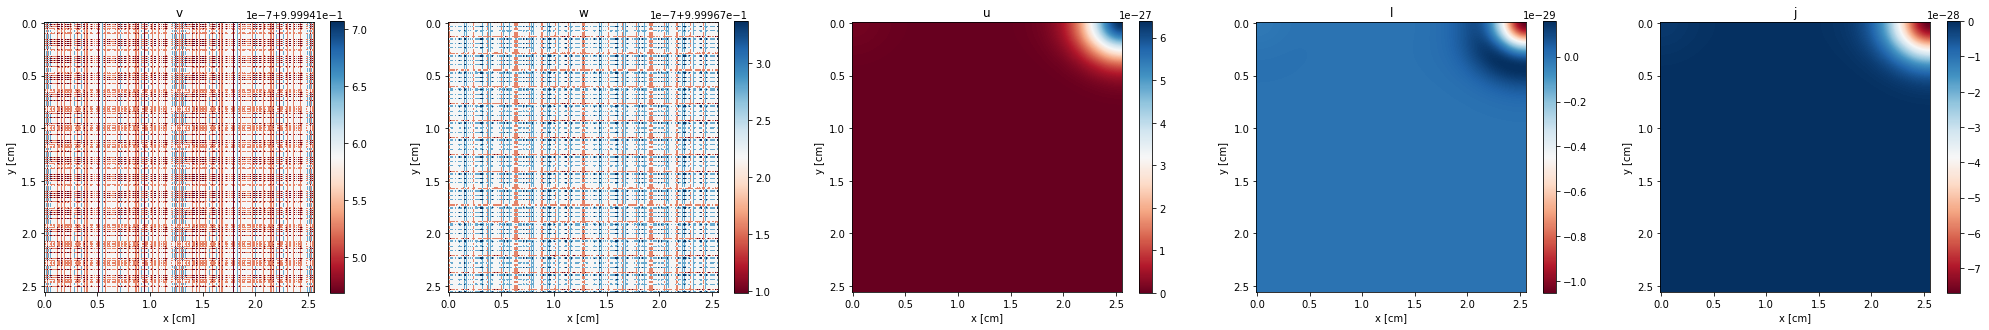

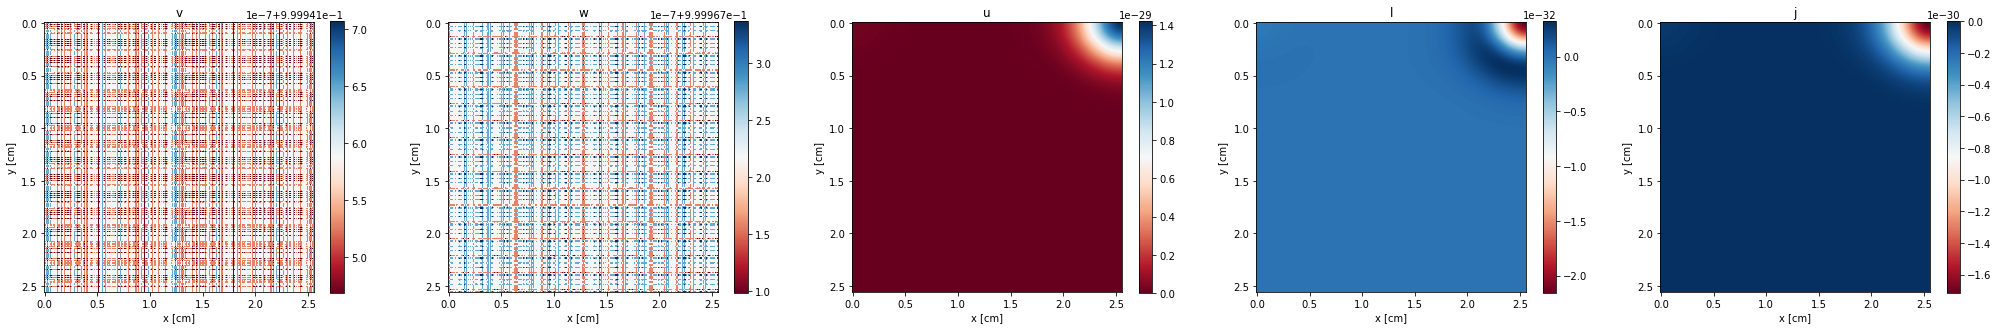

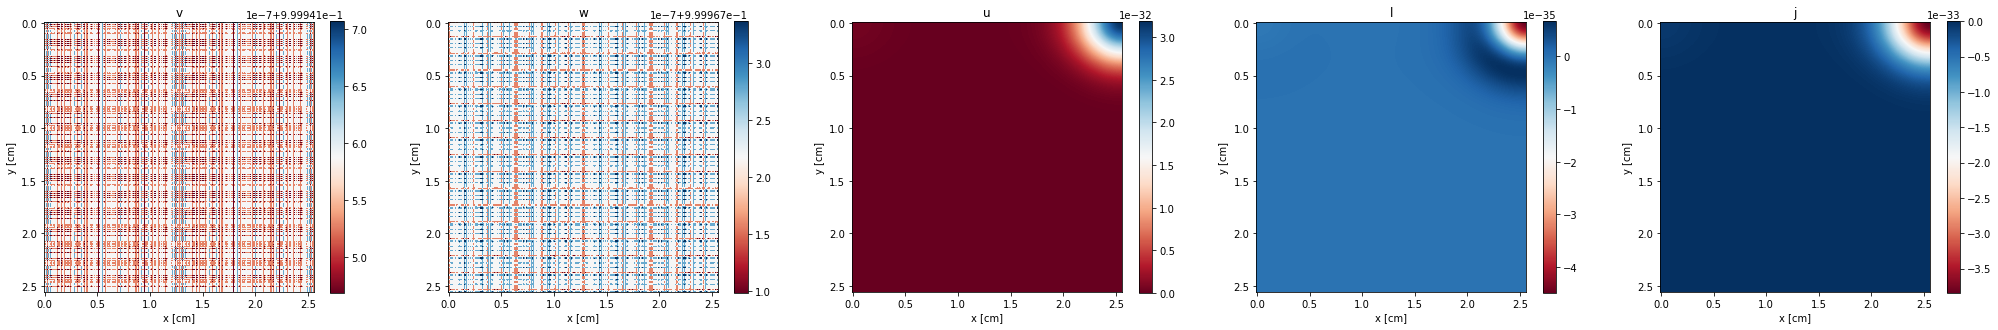

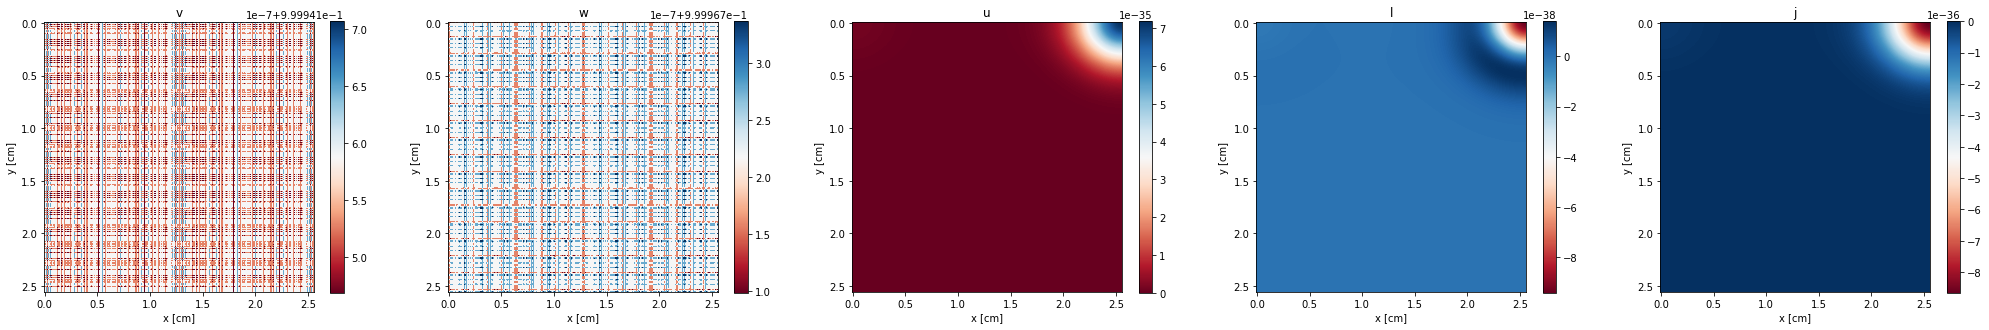

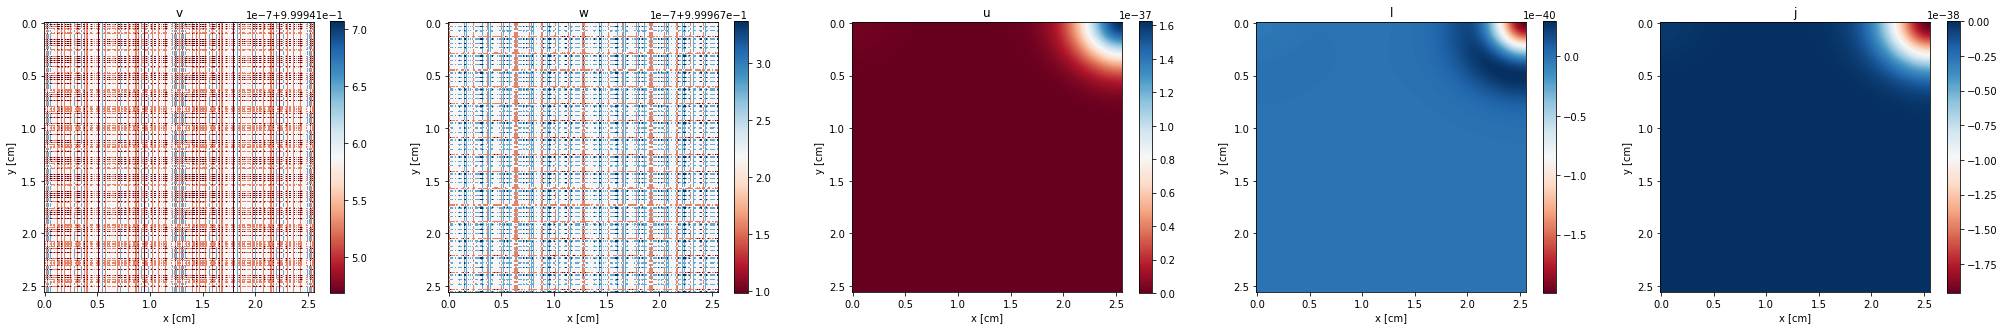

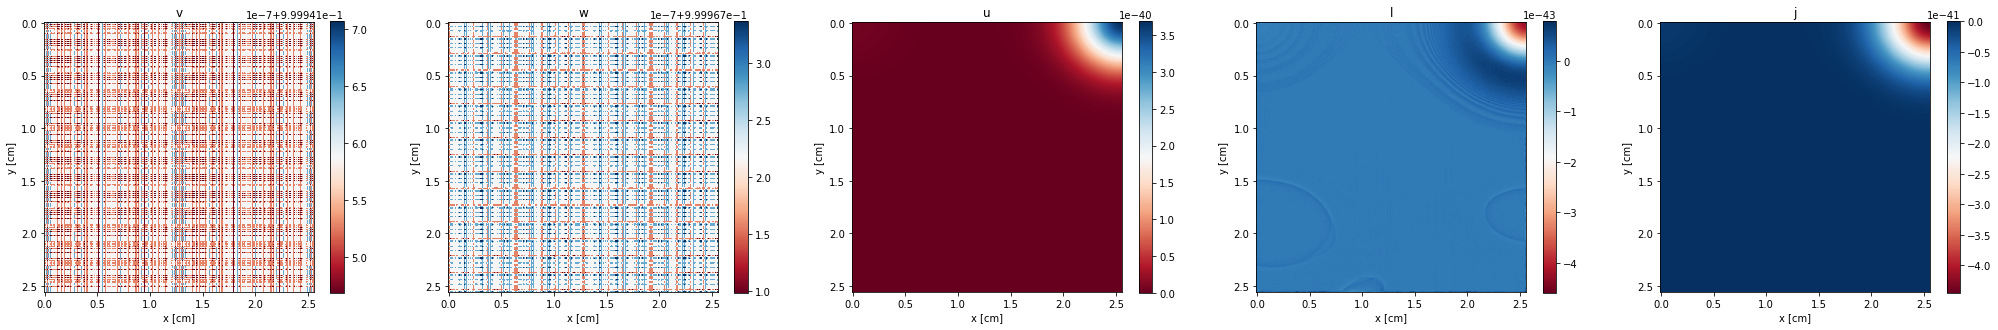

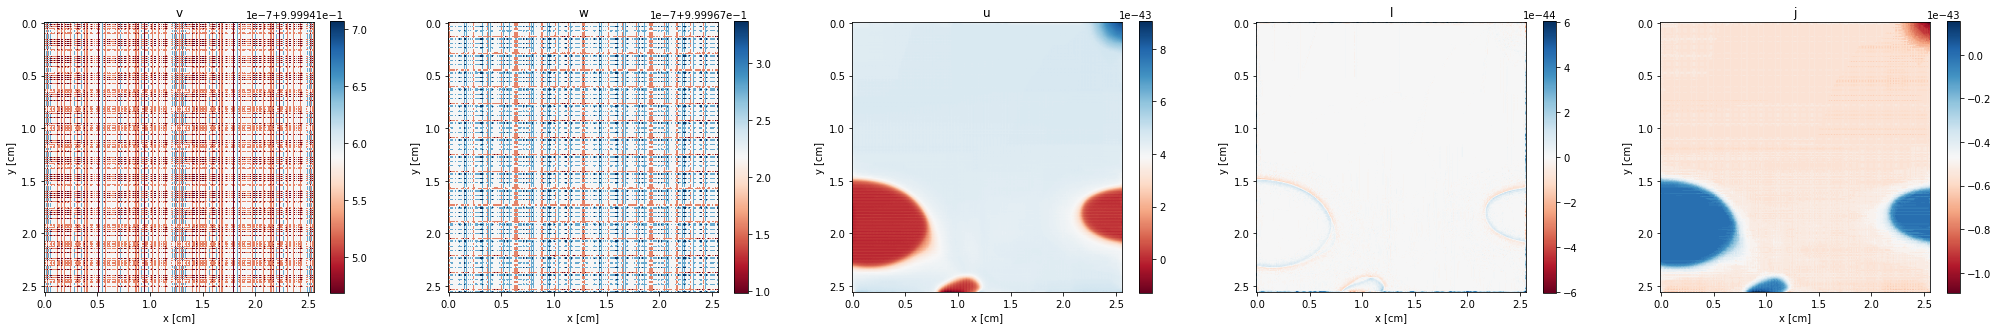

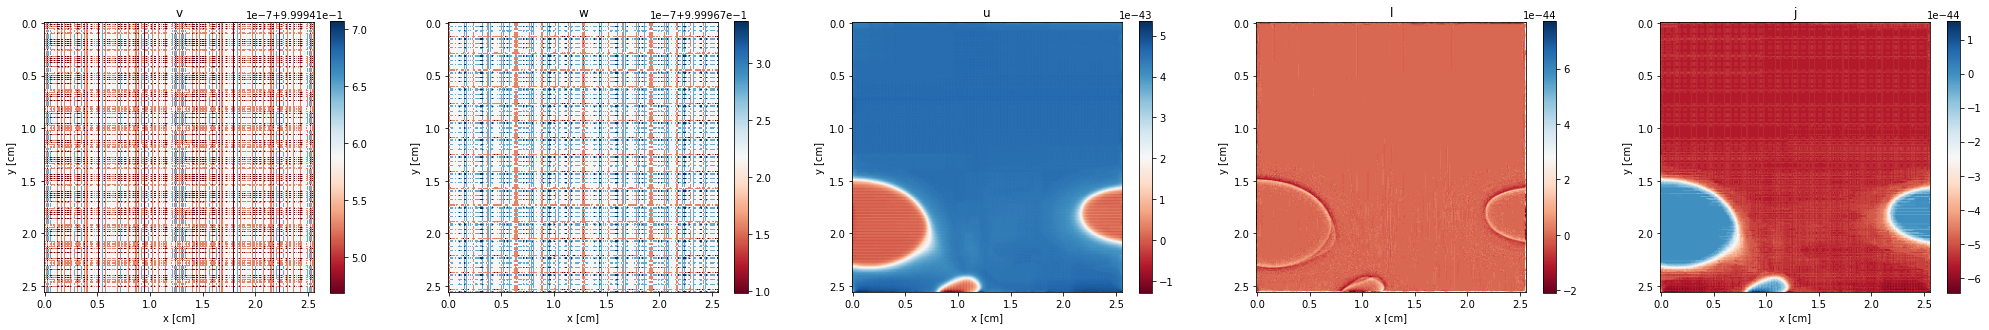

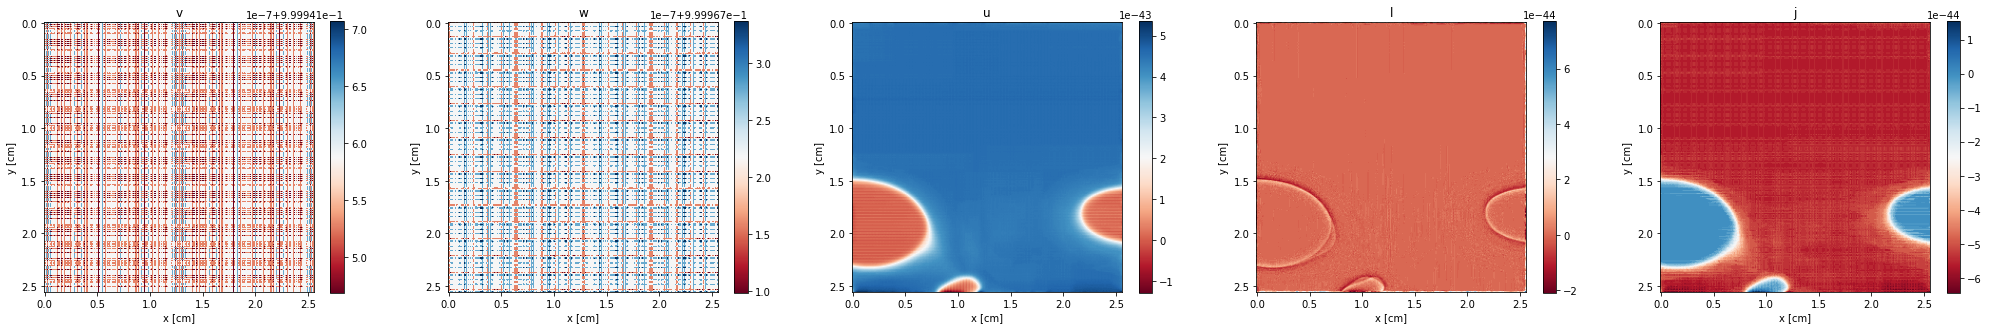

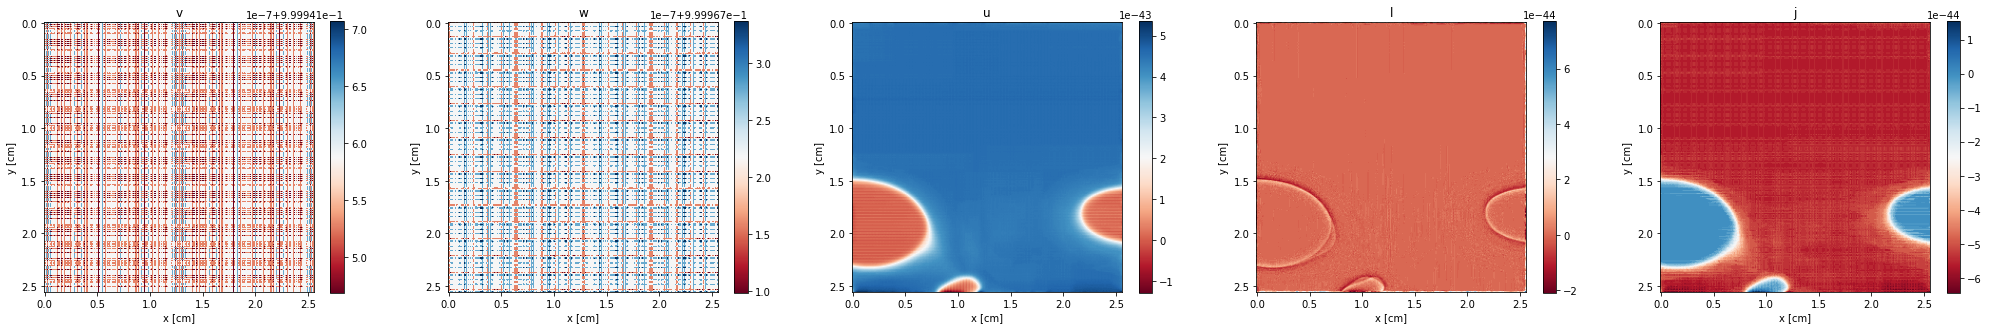

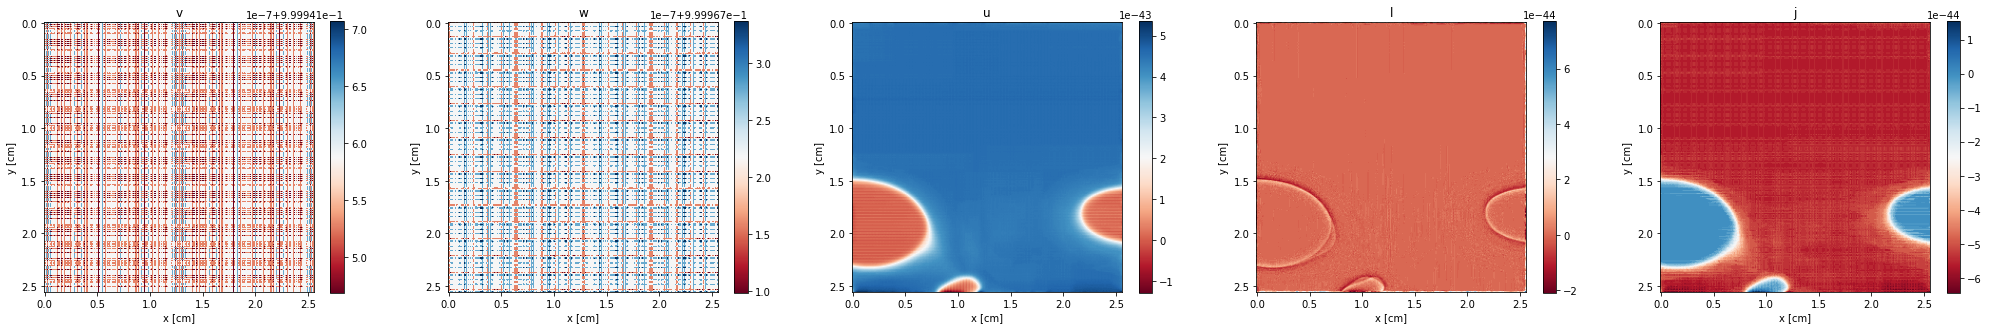

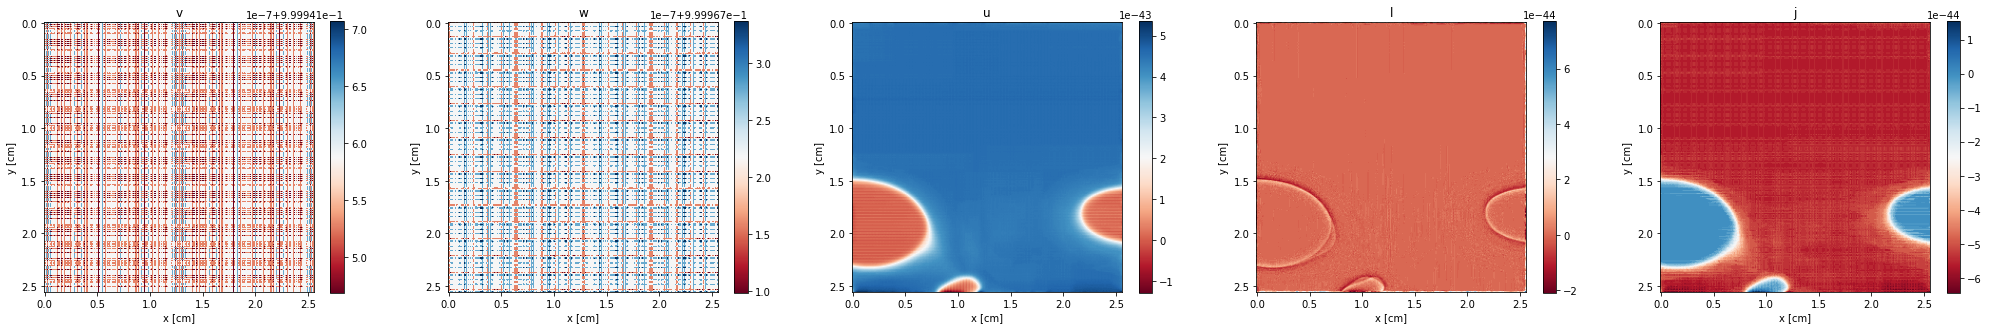

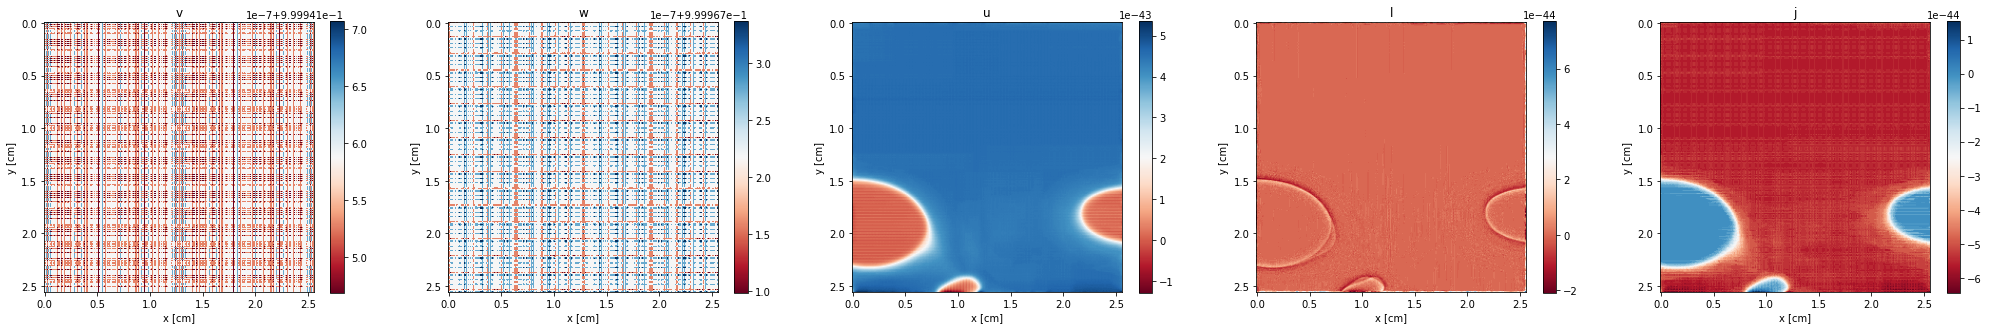

In [7]:
# display
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

for state in states:
    state = fk.model.State(*state)
    fk.plot.plot_state(state, vmin=None, vmax=None)
    plt.show()